In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [5]:
# MySQL connection details (make sure to replace with your actual credentials)
host = 'localhost'
port = '3306'
user = 'root'
password = '123456'
database = 'ads'

# Establishing connection to MySQL database
engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}')

# Query to fetch data
query = "SELECT * FROM parkplatz_info"
df = pd.read_sql(query, engine)

# Display first few rows of the dataframe
df.head()

# Basic statistical analysis
df.describe()

,BREITENGRAD,LAENGENGRAD,ANZAHL_PARKPLÄTZE
count,18.000000,18.000000,18.0
mean,47.379693,8.540678,0.0
std,0.013500,0.029588,0.0
min,47.355922,8.487087,0.0
25%,47.373271,8.520956,0.0
50%,47.377839,8.543971,0.0
75%,47.387309,8.552858,0.0
max,47.407596,8.599559,0.0


In [6]:
# Convert columns to appropriate data types
df['FREIE_PLÄTZE'] = pd.to_numeric(df['FREIE_PLÄTZE'], errors='coerce')
df['PARKDAUER'] = pd.to_numeric(df['PARKDAUER'], errors='coerce')
df['BREITENGRAD'] = pd.to_numeric(df['BREITENGRAD'], errors='coerce')
df['LAENGENGRAD'] = pd.to_numeric(df['LAENGENGRAD'], errors='coerce')

# Handling missing values
df = df.dropna()

# Displaying data types after conversion
df.dtypes

ID                    object
ART                   object
NAME                  object
PREIS                 object
FREIE_PLÄTZE           int64
PARKDAUER              int64
BREITENGRAD          float64
LAENGENGRAD          float64
DIENSTLEISTUNGEN      object
ZAHLUNGSMETHODEN      object
BESCHREIBUNG          object
BESCHREIBUNG_BILD     object
EINFAHRTSHÖHE         object
ANZAHL_PARKPLÄTZE      int64
dtype: object

Mean values:
FREIE_PLÄTZE         46.222222
PARKDAUER             0.000000
BREITENGRAD          47.379693
LAENGENGRAD           8.540678
ANZAHL_PARKPLÄTZE     0.000000
dtype: float64
Median values:
FREIE_PLÄTZE         35.500000
PARKDAUER             0.000000
BREITENGRAD          47.377839
LAENGENGRAD           8.543971
ANZAHL_PARKPLÄTZE     0.000000
dtype: float64
Mode values:
FREIE_PLÄTZE          6.000000
PARKDAUER             0.000000
BREITENGRAD          47.397601
LAENGENGRAD           8.599559
ANZAHL_PARKPLÄTZE     0.000000
Name: 0, dtype: float64


C:\Users\dzana\AppData\Local\Temp\ipykernel_18664\197851764.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=free_places_per_parkhaus, x='FREIE_PLÄTZE', y='NAME', palette='viridis')


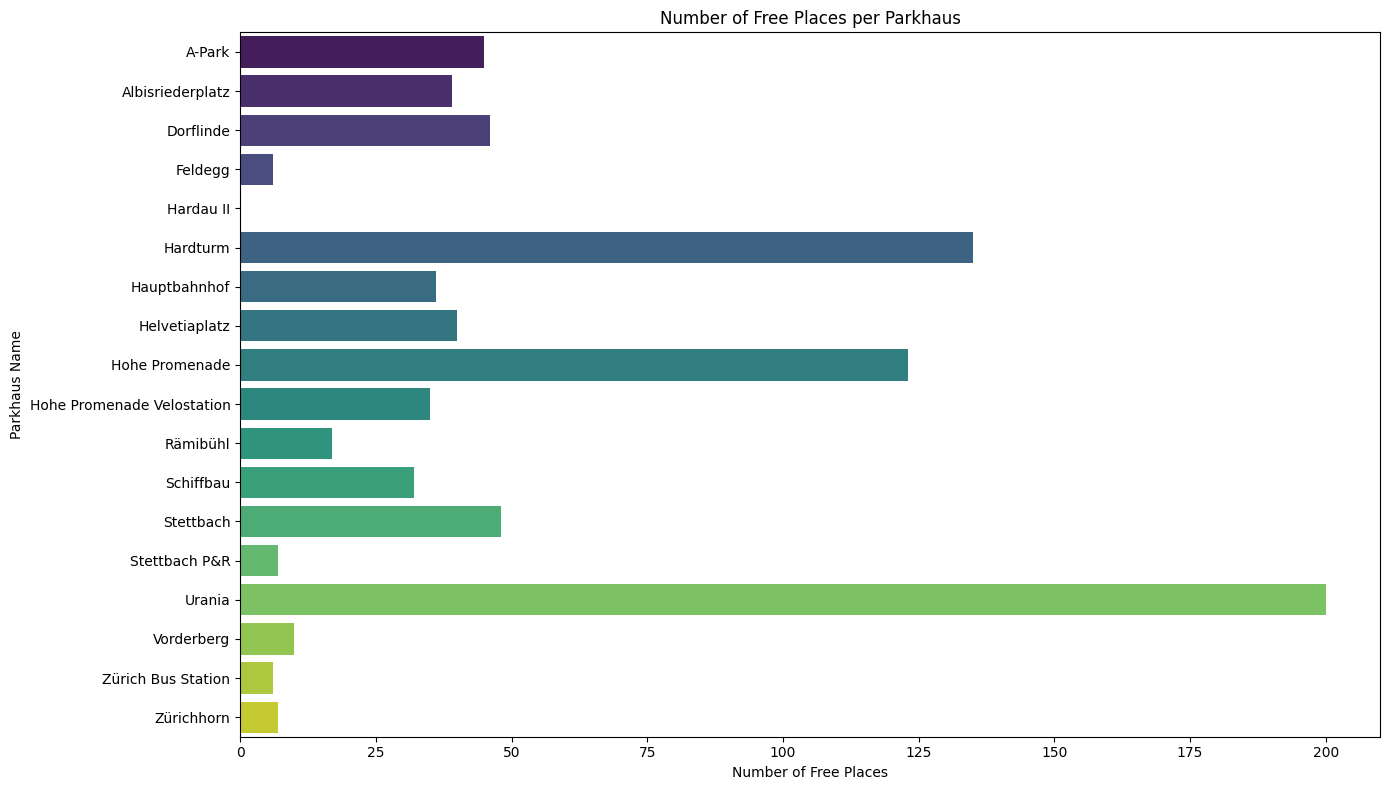

In [11]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Statistical measures
mean_values = numeric_cols.mean()
median_values = numeric_cols.median()
mode_values = numeric_cols.mode().iloc[0]

print(f"Mean values:\n{mean_values}")
print(f"Median values:\n{median_values}")
print(f"Mode values:\n{mode_values}")

# Group by Parkhaus and sum the number of free places
free_places_per_parkhaus = df.groupby('NAME')['FREIE_PLÄTZE'].sum().reset_index()

# Plotting bar plot for free places per parkhaus
plt.figure(figsize=(14, 8))
sns.barplot(data=free_places_per_parkhaus, x='FREIE_PLÄTZE', y='NAME', palette='viridis')
plt.title('Number of Free Places per Parkhaus')
plt.xlabel('Number of Free Places')
plt.ylabel('Parkhaus Name')
plt.tight_layout()
plt.show()

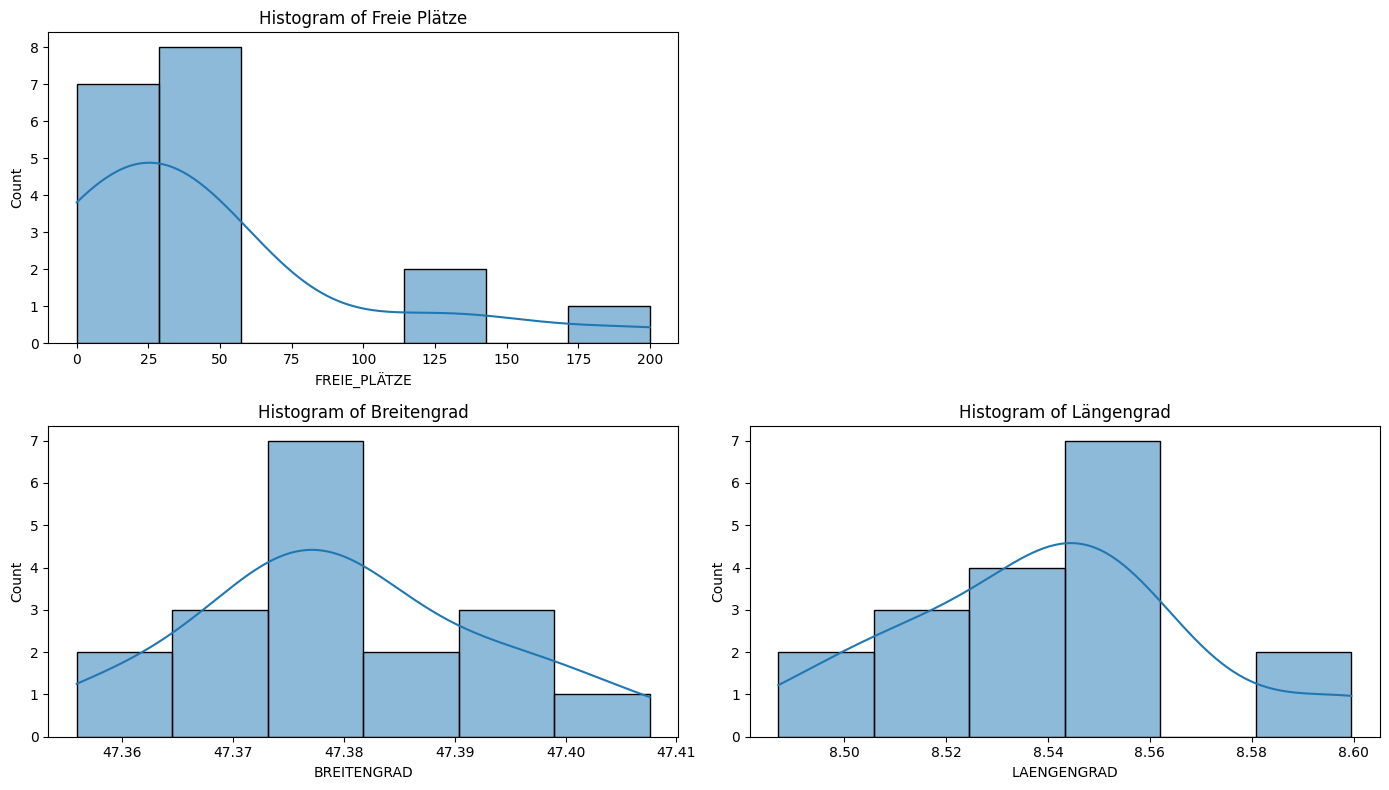

In [12]:
# Plotting histograms
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['FREIE_PLÄTZE'], kde=True)
plt.title('Histogram of Freie Plätze')

plt.subplot(2, 2, 3)
sns.histplot(df['BREITENGRAD'], kde=True)
plt.title('Histogram of Breitengrad')

plt.subplot(2, 2, 4)
sns.histplot(df['LAENGENGRAD'], kde=True)
plt.title('Histogram of Längengrad')

plt.tight_layout()
plt.show()

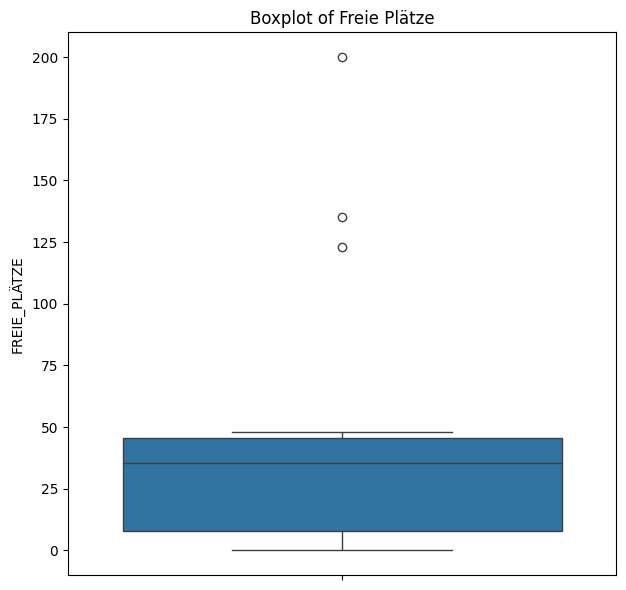

In [13]:
# Creating boxplots
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, y='FREIE_PLÄTZE')
plt.title('Boxplot of Freie Plätze')

plt.tight_layout()
plt.show()